<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Import**

```
* (0) good       34646
* (2) average     9768
* (1) bad         8206
```


**โมเดลไม่ดีเลย** 😢

In [2]:
import pandas as pd
binary2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_2_Group_5_Fold.xlsx')
binary2 = binary2.iloc[:, 1:]
binary2.head(2)

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,good,1
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,1,1,1,1,1,bad,1


In [3]:
import pandas as pd
binary3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_3_Group_5_Fold.xlsx')
binary3 = binary3.iloc[:, 1:]
binary3.head(2)

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,good,1
1,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,good,1


In [4]:
import pandas as pd
data2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_2_Group_5_Fold.xlsx')
data2 = data2.iloc[:, 1:]
data2.head(2)

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.6,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.0,5.284,215.0,81.0,123.0,99.0,21.019,1,good,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.2,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.0,5.755,219.0,64.0,146.0,73.0,15.198,1,bad,1


In [5]:
import pandas as pd
data3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data3 = data3.iloc[:, 1:]
data3.head(2)

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.0,5.562,205.0,69.0,139.0,76.0,36.916,1,good,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.0,5.284,215.0,81.0,123.0,99.0,21.019,1,good,1


In [6]:
tables = [binary2, binary3, data2, data3]

for table in tables:
    if 'NATNL' in table.columns:
        table['NATNL'] = table['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [7]:
tables = [binary2, binary3, data2, data3]

for table in tables:
    if {'PatientUID', 'LabCwhen'}.issubset(table.columns):
        table.sort_values(['PatientUID', 'LabCwhen'], inplace=True)
        table['TimeDiff'] = table.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
        table['TimeDiff'] = table['TimeDiff'].fillna(0)


In [8]:
for table in tables:
    if 'time_t1' in table.columns:
        table['time_t1'] = pd.to_datetime(table['time_t1'])

In [9]:
data2['Group'].unique()

good    44414
bad      8206
Name: Group, dtype: int64

In [11]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']
for table in tables:
    for column in columns_to_encode:
        encoding_map = {category: i for i, category in enumerate(table[column].unique())}
        table[column] = table[column].map(encoding_map)


In [12]:
data2['Group'].value_counts()

0    44414
1     8206
Name: Group, dtype: int64

In [13]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

tables = [binary2, binary3, data2, data3]
table_names = ['binary2', 'binary3', 'data2', 'data3']  # Add the names of your tables here

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

for table, table_name in zip(tables, table_names):
    X = table.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
    y = table['Group']

    all_folds = table['Fold'].unique()

    X_train_scaled_list = []
    y_train_list = []
    X_test_scaled_list = []
    y_test_list = []

    for train_folds, test_fold in kf.split(all_folds):
        train_folds = all_folds[train_folds]
        val_fold = all_folds[test_fold][0]

        # Select rows with the corresponding folds
        train_indices = table['Fold'].isin(train_folds)
        test_indices = table['Fold'] == val_fold

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

        # Store the scaled data for each fold
        X_train_scaled_list.append(X_train_scaled)
        y_train_list.append(y_train)
        X_test_scaled_list.append(X_test_scaled)
        y_test_list.append(y_test)

    # Access the X_train_scaled and y_train for each fold
    for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
    ):
        train_folds, test_fold = train_fold_indices

        print(f"Table: {table_name}, Fold {fold + 1}:")
        print(f"Training set size: {X_train_scaled_fold.shape}")
        print(f"Test set size: {X_test_scaled_fold.shape}")
        print(f"Folds in training set: {train_folds.tolist()}")
        print(f"Folds in test set: {test_fold}")
        print("---\n")


Table: binary2, Fold 1:
Training set size: (42027, 120)
Test set size: (10593, 120)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Table: binary2, Fold 2:
Training set size: (42274, 120)
Test set size: (10346, 120)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Table: binary2, Fold 3:
Training set size: (42184, 120)
Test set size: (10436, 120)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Table: binary2, Fold 4:
Training set size: (41978, 120)
Test set size: (10642, 120)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Table: binary2, Fold 5:
Training set size: (42017, 120)
Test set size: (10603, 120)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Table: binary3, Fold 1:
Training set size: (42184, 120)
Test set size: (10436, 120)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Table: binary3, Fold 2:
Training set size: (41978, 120)
Test set size: (10642, 120)
Folds in training set: [0, 1

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# **Grid Search**

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

tables = [binary2, binary3, data2, data3]
table_names = ['binary2', 'binary3', 'data2', 'data3']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

grid_search_results = []

for table, table_name in zip(tables, table_names):
    X = table.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
    y = table['Group']

    all_folds = table['Fold'].unique()

    for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
        train_folds = all_folds[train_folds]
        val_fold = all_folds[test_fold][0]

        # Select rows with the corresponding folds
        train_indices = table['Fold'].isin(train_folds)
        test_indices = table['Fold'] == val_fold

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        rf_model = RandomForestClassifier()

        grid_search = GridSearchCV(rf_model, param_grid, scoring='accuracy', cv=num_folds, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)

        grid_search_results.append({
            'table_name': table_name,
            'fold': fold + 1,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        })

        print(f"Table: {table_name}, Fold {fold + 1}:")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best Cross-validated Score: {grid_search.best_score_}")
        print("---\n")


In [15]:
import json

with open('rf_grid_search_results.json', 'r') as json_file:
    grid_search_results = json.load(json_file)

In [16]:
best_result_rf = max(grid_search_results, key=lambda x: x['best_score'])
best_params_rf = best_result_rf['best_params']
best_score_rf = best_result_rf['best_score']

print("Aggregated Results for RandomForestClassifier:")
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-validated Score: {best_score_rf}")

Aggregated Results for RandomForestClassifier:
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Best Cross-validated Score: 0.846075653164298


# **Data3**

In [17]:
data3_X = data3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
data3_y = data3['Group']

In [18]:
data3_label_encoder = LabelEncoder()
data3['Group'] = data3_label_encoder.fit_transform(data3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data3_all_folds = data3['Fold'].unique()

data3_accuracy_per_fold = []
data3_conf_mat_list = []
data3_precision_per_fold = []
data3_recall_per_fold = []
data3_f1_per_fold = []
data3_loss_per_fold = []

data3_X_train_before_resampled = []
data3_y_train_before_resampled = []
data3_X_train_after_resampled = []
data3_y_train_after_resampled = []

data3_test_sample_list = []

data3_smote = SMOTE()

In [19]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data3_all_folds)):
    train_folds = data3_all_folds[train_folds]
    test_fold = data3_all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == test_fold
    data3_X_train, data3_X_test = data3_X[train_indices], data3_X[test_indices]
    data3_y_train, data3_y_test = data3_y[train_indices], data3_y[test_indices]
    # Store the original X_train and y_train
    data3_X_train_before_resampled.append(data3_X_train)
    data3_y_train_before_resampled.append(data3_y_train)
    # Apply SMOTE only on the training data
    data3_X_train_resampled, data3_y_train_resampled = data3_smote.fit_resample(data3_X_train, data3_y_train)
    # Store the resampled X_train and y_train
    data3_X_train_after_resampled.append(data3_X_train_resampled)
    data3_y_train_after_resampled.append(data3_y_train_resampled)
    # Store the number of test samples
    data3_test_sample_list.append(len(data3_X_test))
    # Scale
    data3_scaler = StandardScaler()
    data3_X_train_scaled = data3_scaler.fit_transform(data3_X_train_resampled)
    data3_X_test_scaled = data3_scaler.transform(data3_X_test)
    # Create and train RandomForestClassifier model using best parameters
    best_params = grid_search_results[fold]['best_params']
    model_x = RandomForestClassifier(**best_params)
    model_x.fit(data3_X_train_scaled, data3_y_train_resampled)
    # Make predictions on the test set
    data3_y_pred = model_x.predict(data3_X_test_scaled)
    # Evaluate performance
    data3_conf_mat = confusion_matrix(data3_y_test, data3_y_pred)
    data3_conf_mat_list.append(data3_conf_mat)
    data3_accuracy = accuracy_score(data3_y_test, data3_y_pred)
    data3_precision = precision_score(data3_y_test, data3_y_pred, average='weighted')
    data3_recall = recall_score(data3_y_test, data3_y_pred, average='weighted')
    data3_f1 = f1_score(data3_y_test, data3_y_pred, average='weighted')
    data3_accuracy_per_fold.append(data3_accuracy)
    data3_precision_per_fold.append(data3_precision)
    data3_recall_per_fold.append(data3_recall)
    data3_f1_per_fold.append(data3_f1)
    print(f"Fold {fold + 1} - Accuracy: {data3_accuracy*100:.2f}%")
    print(f"Precision: {data3_precision:.4f}, Recall: {data3_recall:.4f}, F1-Score: {data3_f1:.4f}")
    print("---\n")

Fold 1 - Accuracy: 61.50%
Precision: 0.5377, Recall: 0.6150, F1-Score: 0.5619
---

Fold 2 - Accuracy: 61.03%
Precision: 0.5369, Recall: 0.6103, F1-Score: 0.5589
---

Fold 3 - Accuracy: 61.13%
Precision: 0.5358, Recall: 0.6113, F1-Score: 0.5566
---

Fold 4 - Accuracy: 61.66%
Precision: 0.5446, Recall: 0.6166, F1-Score: 0.5619
---

Fold 5 - Accuracy: 58.98%
Precision: 0.5405, Recall: 0.5898, F1-Score: 0.5587
---



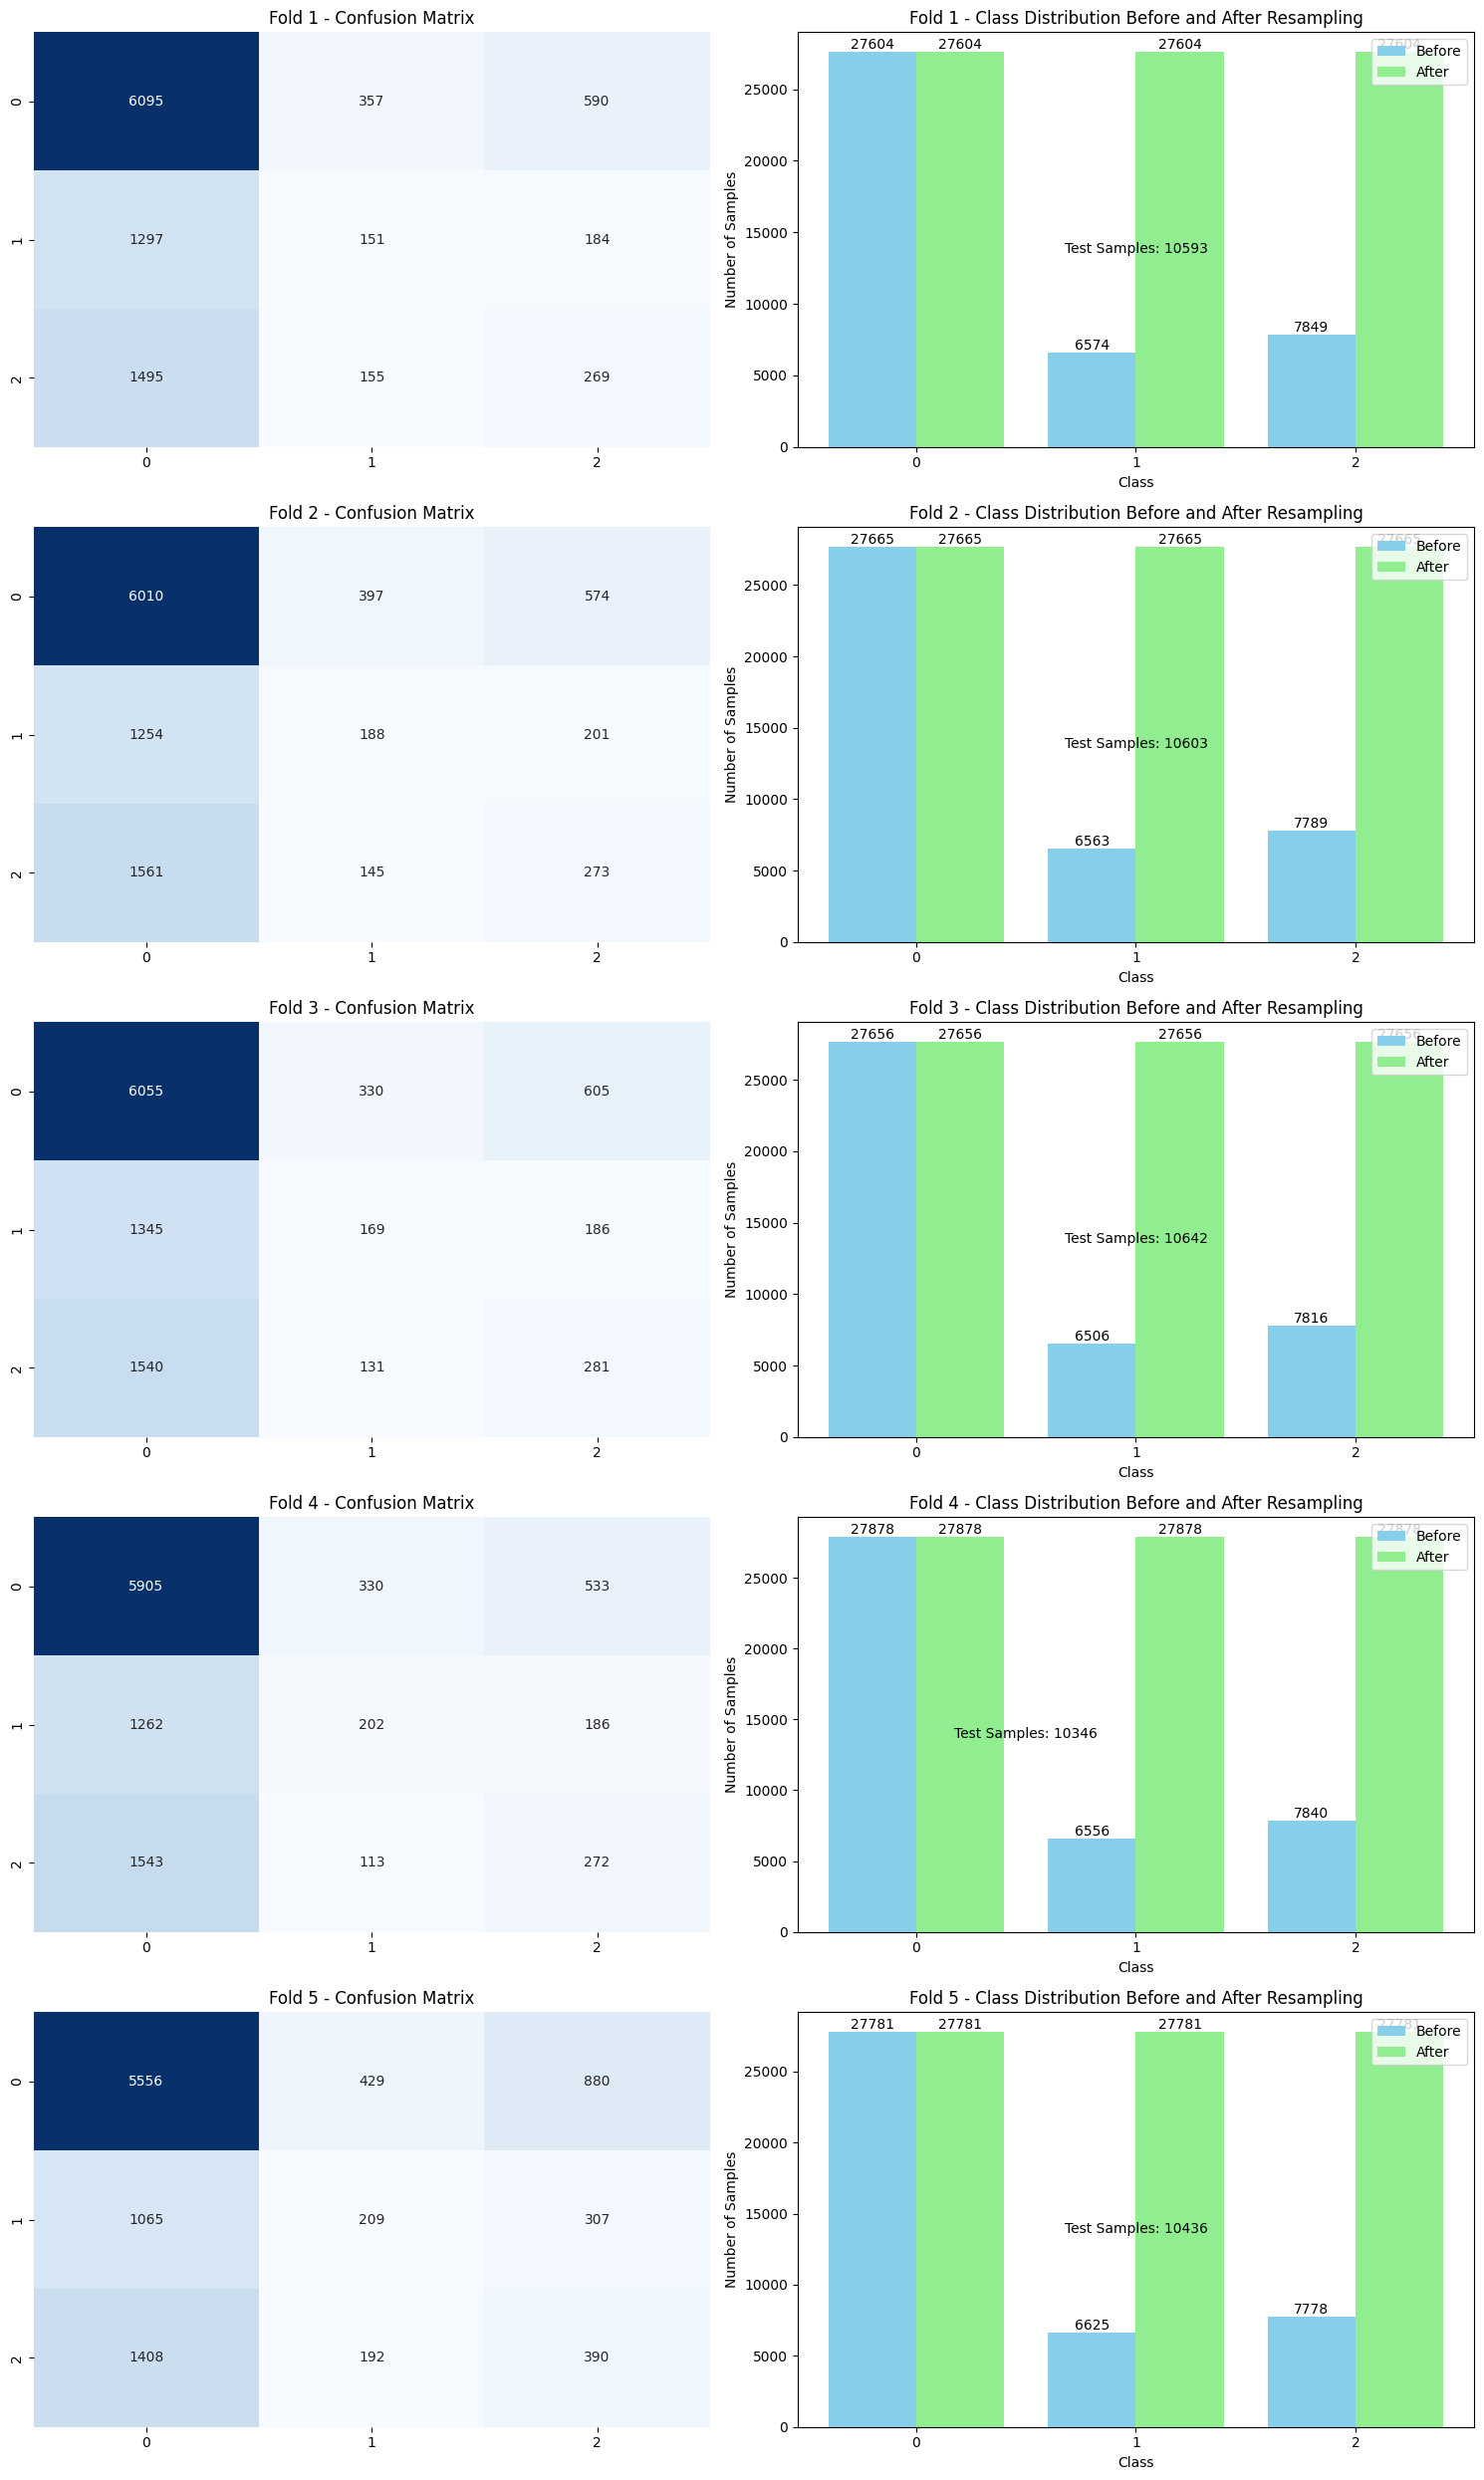

In [20]:
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Original vs. Resampled Train Samples
    ax2 = axes[fold, 1]

    original_label_counts = Counter(data3_y_train_before_resampled[fold])
    resampled_label_counts = Counter(data3_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax2.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax2.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax2.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Number of Samples')
    ax2.set_xticks(resampled_classes)
    ax2.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax2.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax2.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax2.text(center_x, center_y, f'Test Samples: {data3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


# **Binary3**

In [21]:
binary3_X = binary3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'LabLocation','Fold','Slopes'], axis=1)
binary3_y = binary3['Group']

In [22]:
binary3_label_encoder = LabelEncoder()
binary3['Group'] = binary3_label_encoder.fit_transform(binary3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
binary3_all_folds = binary3['Fold'].unique()

binary3_accuracy_per_fold = []
binary3_conf_mat_list = []
binary3_precision_per_fold = []
binary3_recall_per_fold = []
binary3_f1_per_fold = []
binary3_loss_per_fold = []

binary3_X_train_before_resampled = []
binary3_y_train_before_resampled = []
binary3_X_train_after_resampled = []
binary3_y_train_after_resampled = []

binary3_test_sample_list = []

binary3_smote = SMOTE()


In [23]:
for fold, (train_folds, test_fold) in enumerate(kf.split(binary3_all_folds)):
    train_folds = binary3_all_folds[train_folds]
    test_fold = binary3_all_folds[test_fold][0]
    train_indices = binary3['Fold'].isin(train_folds)
    test_indices = binary3['Fold'] == test_fold

    binary3_X_train, binary3_X_test = binary3_X[train_indices], binary3_X[test_indices]
    binary3_y_train, binary3_y_test = binary3_y[train_indices], binary3_y[test_indices]

    # Store the original X_train and y_train
    binary3_X_train_before_resampled.append(binary3_X_train)
    binary3_y_train_before_resampled.append(binary3_y_train)

    # Apply SMOTE only on the training data
    binary3_X_train_resampled, binary3_y_train_resampled = binary3_smote.fit_resample(binary3_X_train, binary3_y_train)

    # Store the resampled X_train and y_train
    binary3_X_train_after_resampled.append(binary3_X_train_resampled)
    binary3_y_train_after_resampled.append(binary3_y_train_resampled)

    # Store the number of test samples
    binary3_test_sample_list.append(len(binary3_X_test))

    # Scale
    binary3_scaler = StandardScaler()
    binary3_X_train_scaled = binary3_scaler.fit_transform(binary3_X_train_resampled)
    binary3_X_test_scaled = binary3_scaler.transform(binary3_X_test)

    # Create and train RandomForestClassifier model using best parameters
    best_params = grid_search_results[fold]['best_params']
    model_x = RandomForestClassifier(**best_params)
    model_x.fit(binary3_X_train_scaled, binary3_y_train_resampled)

    # Make predictions on the test set
    binary3_y_pred = model_x.predict(binary3_X_test_scaled)

    # Evaluate performance
    binary3_conf_mat = confusion_matrix(binary3_y_test, binary3_y_pred)
    binary3_conf_mat_list.append(binary3_conf_mat)

    binary3_accuracy = accuracy_score(binary3_y_test, binary3_y_pred)
    binary3_precision = precision_score(binary3_y_test, binary3_y_pred, average='weighted')
    binary3_recall = recall_score(binary3_y_test, binary3_y_pred, average='weighted')
    binary3_f1 = f1_score(binary3_y_test, binary3_y_pred, average='weighted')

    binary3_accuracy_per_fold.append(binary3_accuracy)
    binary3_precision_per_fold.append(binary3_precision)
    binary3_recall_per_fold.append(binary3_recall)
    binary3_f1_per_fold.append(binary3_f1)

    print(f"Fold {fold + 1} - Accuracy: {binary3_accuracy*100:.2f}%")
    print(f"Precision: {binary3_precision:.4f}, Recall: {binary3_recall:.4f}, F1-Score: {binary3_f1:.4f}")
    print("---\n")


Fold 1 - Accuracy: 61.90%
Precision: 0.5371, Recall: 0.6190, F1-Score: 0.5568
---

Fold 2 - Accuracy: 61.45%
Precision: 0.5372, Recall: 0.6145, F1-Score: 0.5577
---

Fold 3 - Accuracy: 61.63%
Precision: 0.5390, Recall: 0.6163, F1-Score: 0.5617
---

Fold 4 - Accuracy: 61.73%
Precision: 0.5376, Recall: 0.6173, F1-Score: 0.5590
---

Fold 5 - Accuracy: 59.91%
Precision: 0.5365, Recall: 0.5991, F1-Score: 0.5566
---



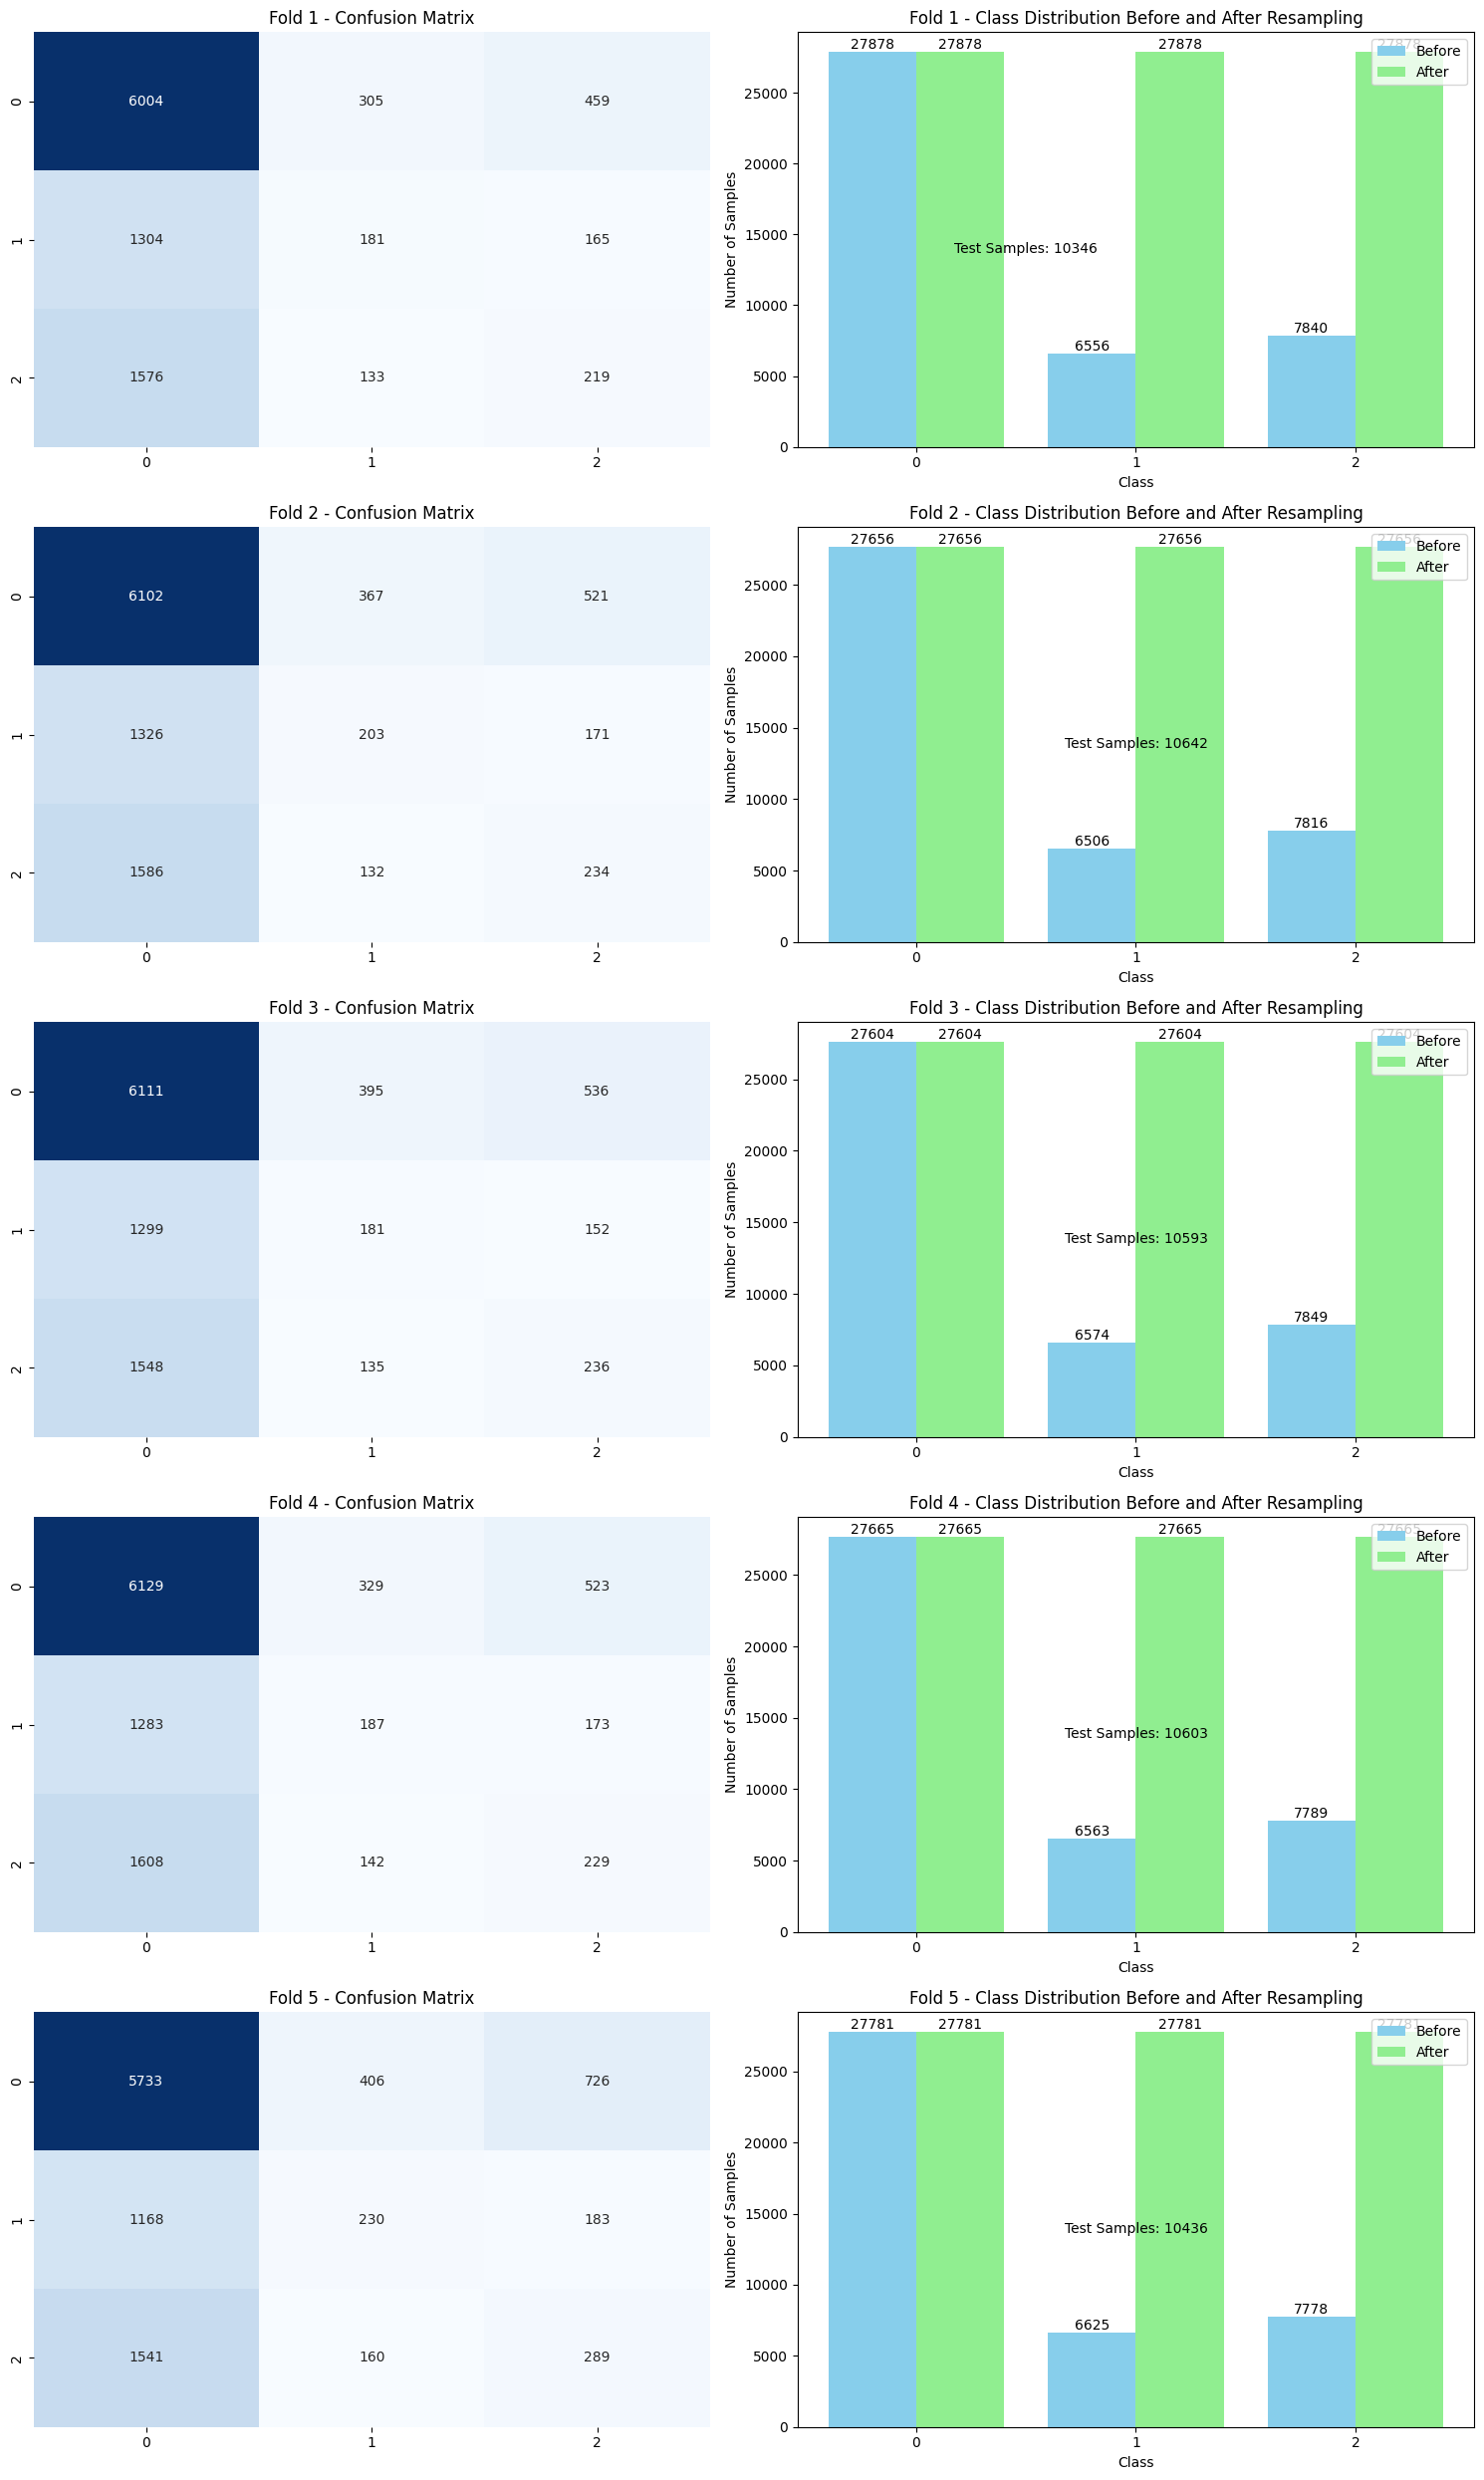

In [24]:
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = binary3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Original vs. Resampled Train Samples
    ax2 = axes[fold, 1]

    original_label_counts = Counter(binary3_y_train_before_resampled[fold])
    resampled_label_counts = Counter(binary3_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax2.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax2.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax2.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Number of Samples')
    ax2.set_xticks(resampled_classes)
    ax2.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax2.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax2.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax2.text(center_x, center_y, f'Test Samples: {binary3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


# **Binary2**

In [25]:
binary2_X = binary2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
binary2_y = binary2['Group']

In [26]:
binary2_label_encoder = LabelEncoder()
binary2['Group'] = binary2_label_encoder.fit_transform(binary2['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
binary2_all_folds = binary2['Fold'].unique()

binary2_accuracy_per_fold = []
binary2_conf_mat_list = []
binary2_precision_per_fold = []
binary2_recall_per_fold = []
binary2_f1_per_fold = []
binary2_loss_per_fold = []

binary2_X_train_before_resampled = []
binary2_y_train_before_resampled = []
binary2_X_train_after_resampled = []
binary2_y_train_after_resampled = []

binary2_test_sample_list = []

binary2_smote = SMOTE()


In [27]:
for fold, (train_folds, test_fold) in enumerate(kf.split(binary2_all_folds)):
    train_folds = binary2_all_folds[train_folds]
    test_fold = binary2_all_folds[test_fold][0]
    train_indices = binary2['Fold'].isin(train_folds)
    test_indices = binary2['Fold'] == test_fold

    binary2_X_train, binary2_X_test = binary2_X[train_indices], binary2_X[test_indices]
    binary2_y_train, binary2_y_test = binary2_y[train_indices], binary2_y[test_indices]

    # Store the original X_train and y_train
    binary2_X_train_before_resampled.append(binary2_X_train)
    binary2_y_train_before_resampled.append(binary2_y_train)

    # Apply SMOTE only on the training data
    binary2_X_train_resampled, binary2_y_train_resampled = binary2_smote.fit_resample(binary2_X_train, binary2_y_train)

    # Store the resampled X_train and y_train
    binary2_X_train_after_resampled.append(binary2_X_train_resampled)
    binary2_y_train_after_resampled.append(binary2_y_train_resampled)

    # Store the number of test samples
    binary2_test_sample_list.append(len(binary2_X_test))

    # Scale
    binary2_scaler = StandardScaler()
    binary2_X_train_scaled = binary2_scaler.fit_transform(binary2_X_train_resampled)
    binary2_X_test_scaled = binary2_scaler.transform(binary2_X_test)

    # Create and train RandomForestClassifier model using best parameters
    best_params = grid_search_results[fold]['best_params']
    model_x = RandomForestClassifier(**best_params)
    model_x.fit(binary2_X_train_scaled, binary2_y_train_resampled)

    # Make predictions on the test set
    binary2_y_pred = model_x.predict(binary2_X_test_scaled)

    # Evaluate performance
    binary2_conf_mat = confusion_matrix(binary2_y_test, binary2_y_pred)
    binary2_conf_mat_list.append(binary2_conf_mat)

    binary2_accuracy = accuracy_score(binary2_y_test, binary2_y_pred)
    binary2_precision = precision_score(binary2_y_test, binary2_y_pred, average='weighted')
    binary2_recall = recall_score(binary2_y_test, binary2_y_pred, average='weighted')
    binary2_f1 = f1_score(binary2_y_test, binary2_y_pred, average='weighted')

    binary2_accuracy_per_fold.append(binary2_accuracy)
    binary2_precision_per_fold.append(binary2_precision)
    binary2_recall_per_fold.append(binary2_recall)
    binary2_f1_per_fold.append(binary2_f1)

    print(f"Fold {fold + 1} - Accuracy: {binary2_accuracy*100:.2f}%")
    print(f"Precision: {binary2_precision:.4f}, Recall: {binary2_recall:.4f}, F1-Score: {binary2_f1:.4f}")
    print("---\n")

Fold 1 - Accuracy: 81.91%
Precision: 0.7585, Recall: 0.8191, F1-Score: 0.7777
---

Fold 2 - Accuracy: 81.93%
Precision: 0.7538, Recall: 0.8193, F1-Score: 0.7751
---

Fold 3 - Accuracy: 82.10%
Precision: 0.7592, Recall: 0.8210, F1-Score: 0.7820
---

Fold 4 - Accuracy: 81.81%
Precision: 0.7565, Recall: 0.8181, F1-Score: 0.7790
---

Fold 5 - Accuracy: 79.91%
Precision: 0.7586, Recall: 0.7991, F1-Score: 0.7756
---



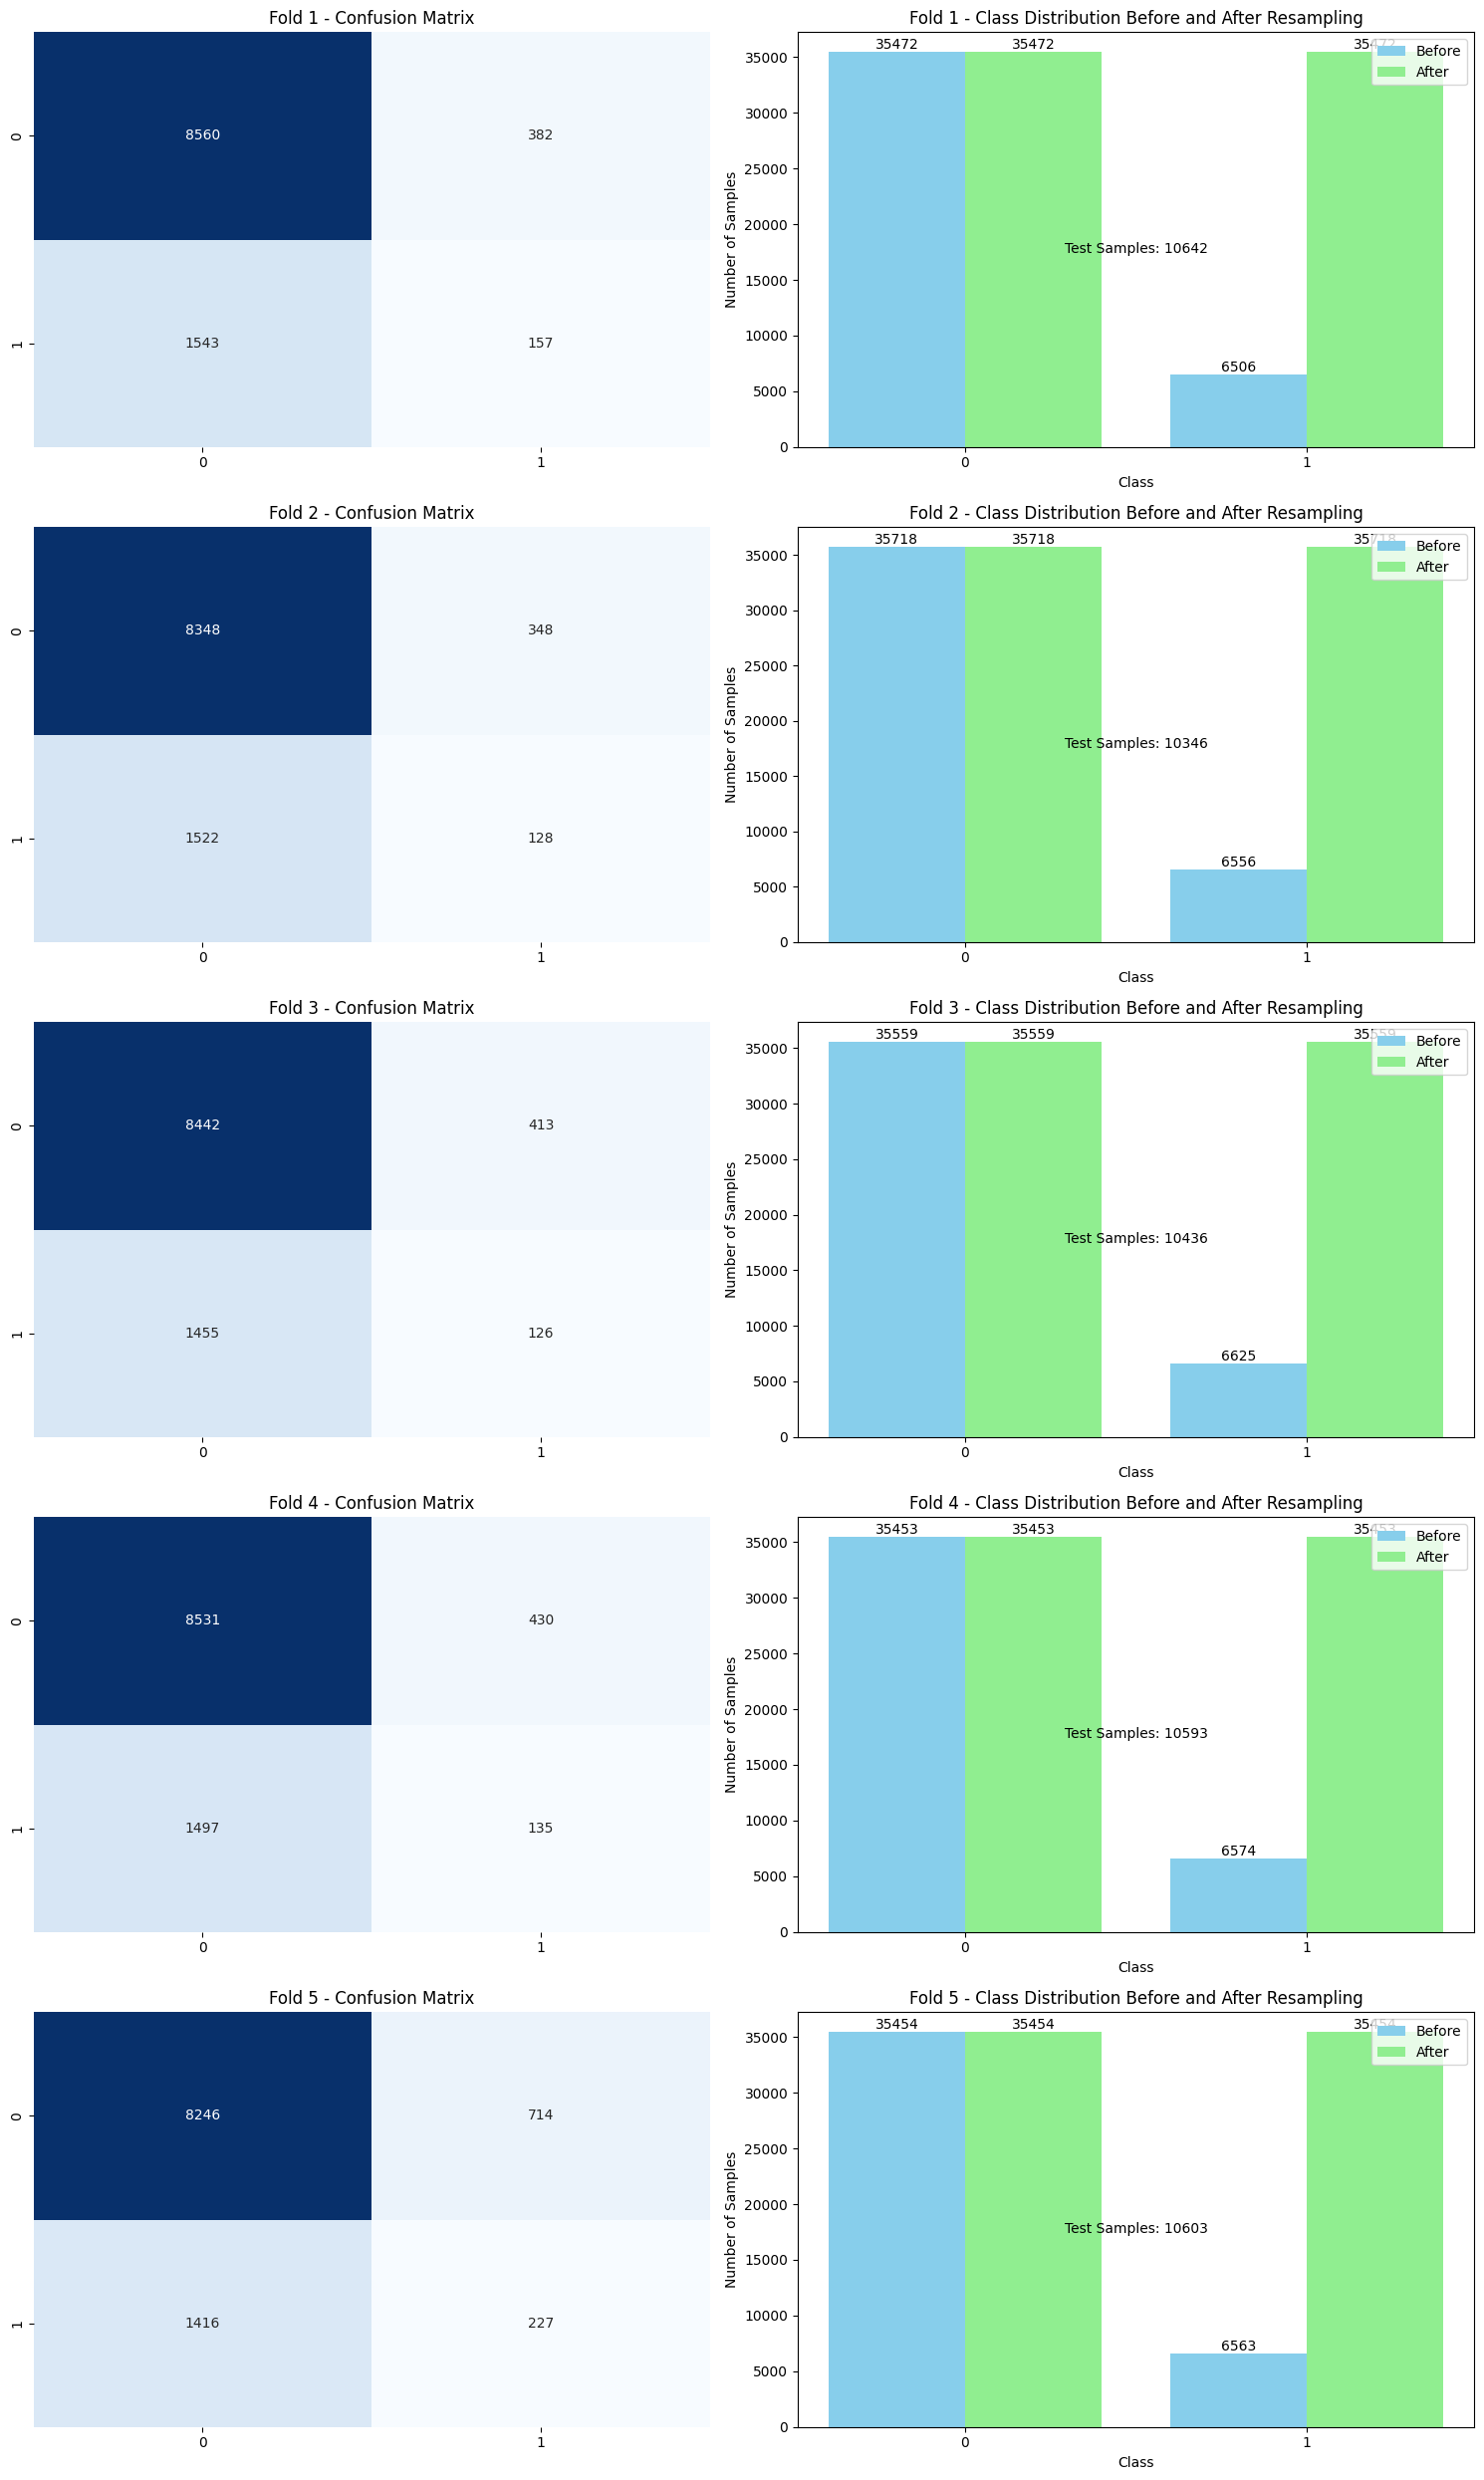

In [28]:
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = binary2_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Original vs. Resampled Train Samples
    ax2 = axes[fold, 1]

    original_label_counts = Counter(binary2_y_train_before_resampled[fold])
    resampled_label_counts = Counter(binary2_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax2.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax2.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax2.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Number of Samples')
    ax2.set_xticks(resampled_classes)
    ax2.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax2.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax2.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax2.text(center_x, center_y, f'Test Samples: {binary2_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


# **Data2**

In [29]:
data2_X = data2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
data2_y = data2['Group']

In [30]:
data2_label_encoder = LabelEncoder()
data2['Group'] = data2_label_encoder.fit_transform(data2['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data2_all_folds = data2['Fold'].unique()

data2_accuracy_per_fold = []
data2_conf_mat_list = []
data2_precision_per_fold = []
data2_recall_per_fold = []
data2_f1_per_fold = []
data2_loss_per_fold = []

data2_X_train_before_resampled = []
data2_y_train_before_resampled = []
data2_X_train_after_resampled = []
data2_y_train_after_resampled = []

data2_test_sample_list = []

data2_smote = SMOTE()

In [31]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data2_all_folds)):
    train_folds = data2_all_folds[train_folds]
    test_fold = data2_all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == test_fold

    data2_X_train, data2_X_test = data2_X[train_indices], data2_X[test_indices]
    data2_y_train, data2_y_test = data2_y[train_indices], data2_y[test_indices]

    # Store the original X_train and y_train
    data2_X_train_before_resampled.append(data2_X_train)
    data2_y_train_before_resampled.append(data2_y_train)

    # Apply SMOTE only on the training data
    data2_X_train_resampled, data2_y_train_resampled = data2_smote.fit_resample(data2_X_train, data2_y_train)

    # Store the resampled X_train and y_train
    data2_X_train_after_resampled.append(data2_X_train_resampled)
    data2_y_train_after_resampled.append(data2_y_train_resampled)

    # Store the number of test samples
    data2_test_sample_list.append(len(data2_X_test))

    # Scale
    data2_scaler = StandardScaler()
    data2_X_train_scaled = data2_scaler.fit_transform(data2_X_train_resampled)
    data2_X_test_scaled = data2_scaler.transform(data2_X_test)

    # Create and train RandomForestClassifier model using best parameters
    best_params = grid_search_results[fold]['best_params']
    model_x = RandomForestClassifier(**best_params)
    model_x.fit(data2_X_train_scaled, data2_y_train_resampled)

    # Make predictions on the test set
    data2_y_pred = model_x.predict(data2_X_test_scaled)

    # Evaluate performance
    data2_conf_mat = confusion_matrix(data2_y_test, data2_y_pred)
    data2_conf_mat_list.append(data2_conf_mat)

    data2_accuracy = accuracy_score(data2_y_test, data2_y_pred)
    data2_precision = precision_score(data2_y_test, data2_y_pred, average='weighted')
    data2_recall = recall_score(data2_y_test, data2_y_pred, average='weighted')
    data2_f1 = f1_score(data2_y_test, data2_y_pred, average='weighted')

    data2_accuracy_per_fold.append(data2_accuracy)
    data2_precision_per_fold.append(data2_precision)
    data2_recall_per_fold.append(data2_recall)
    data2_f1_per_fold.append(data2_f1)

    print(f"Fold {fold + 1} - Accuracy: {data2_accuracy*100:.2f}%")
    print(f"Precision: {data2_precision:.4f}, Recall: {data2_recall:.4f}, F1-Score: {data2_f1:.4f}")
    print("---\n")


Fold 1 - Accuracy: 82.33%
Precision: 0.7601, Recall: 0.8233, F1-Score: 0.7828
---

Fold 2 - Accuracy: 82.34%
Precision: 0.7590, Recall: 0.8234, F1-Score: 0.7778
---

Fold 3 - Accuracy: 81.62%
Precision: 0.7504, Recall: 0.8162, F1-Score: 0.7729
---

Fold 4 - Accuracy: 81.68%
Precision: 0.7564, Recall: 0.8168, F1-Score: 0.7785
---

Fold 5 - Accuracy: 77.33%
Precision: 0.7525, Recall: 0.7733, F1-Score: 0.7623
---



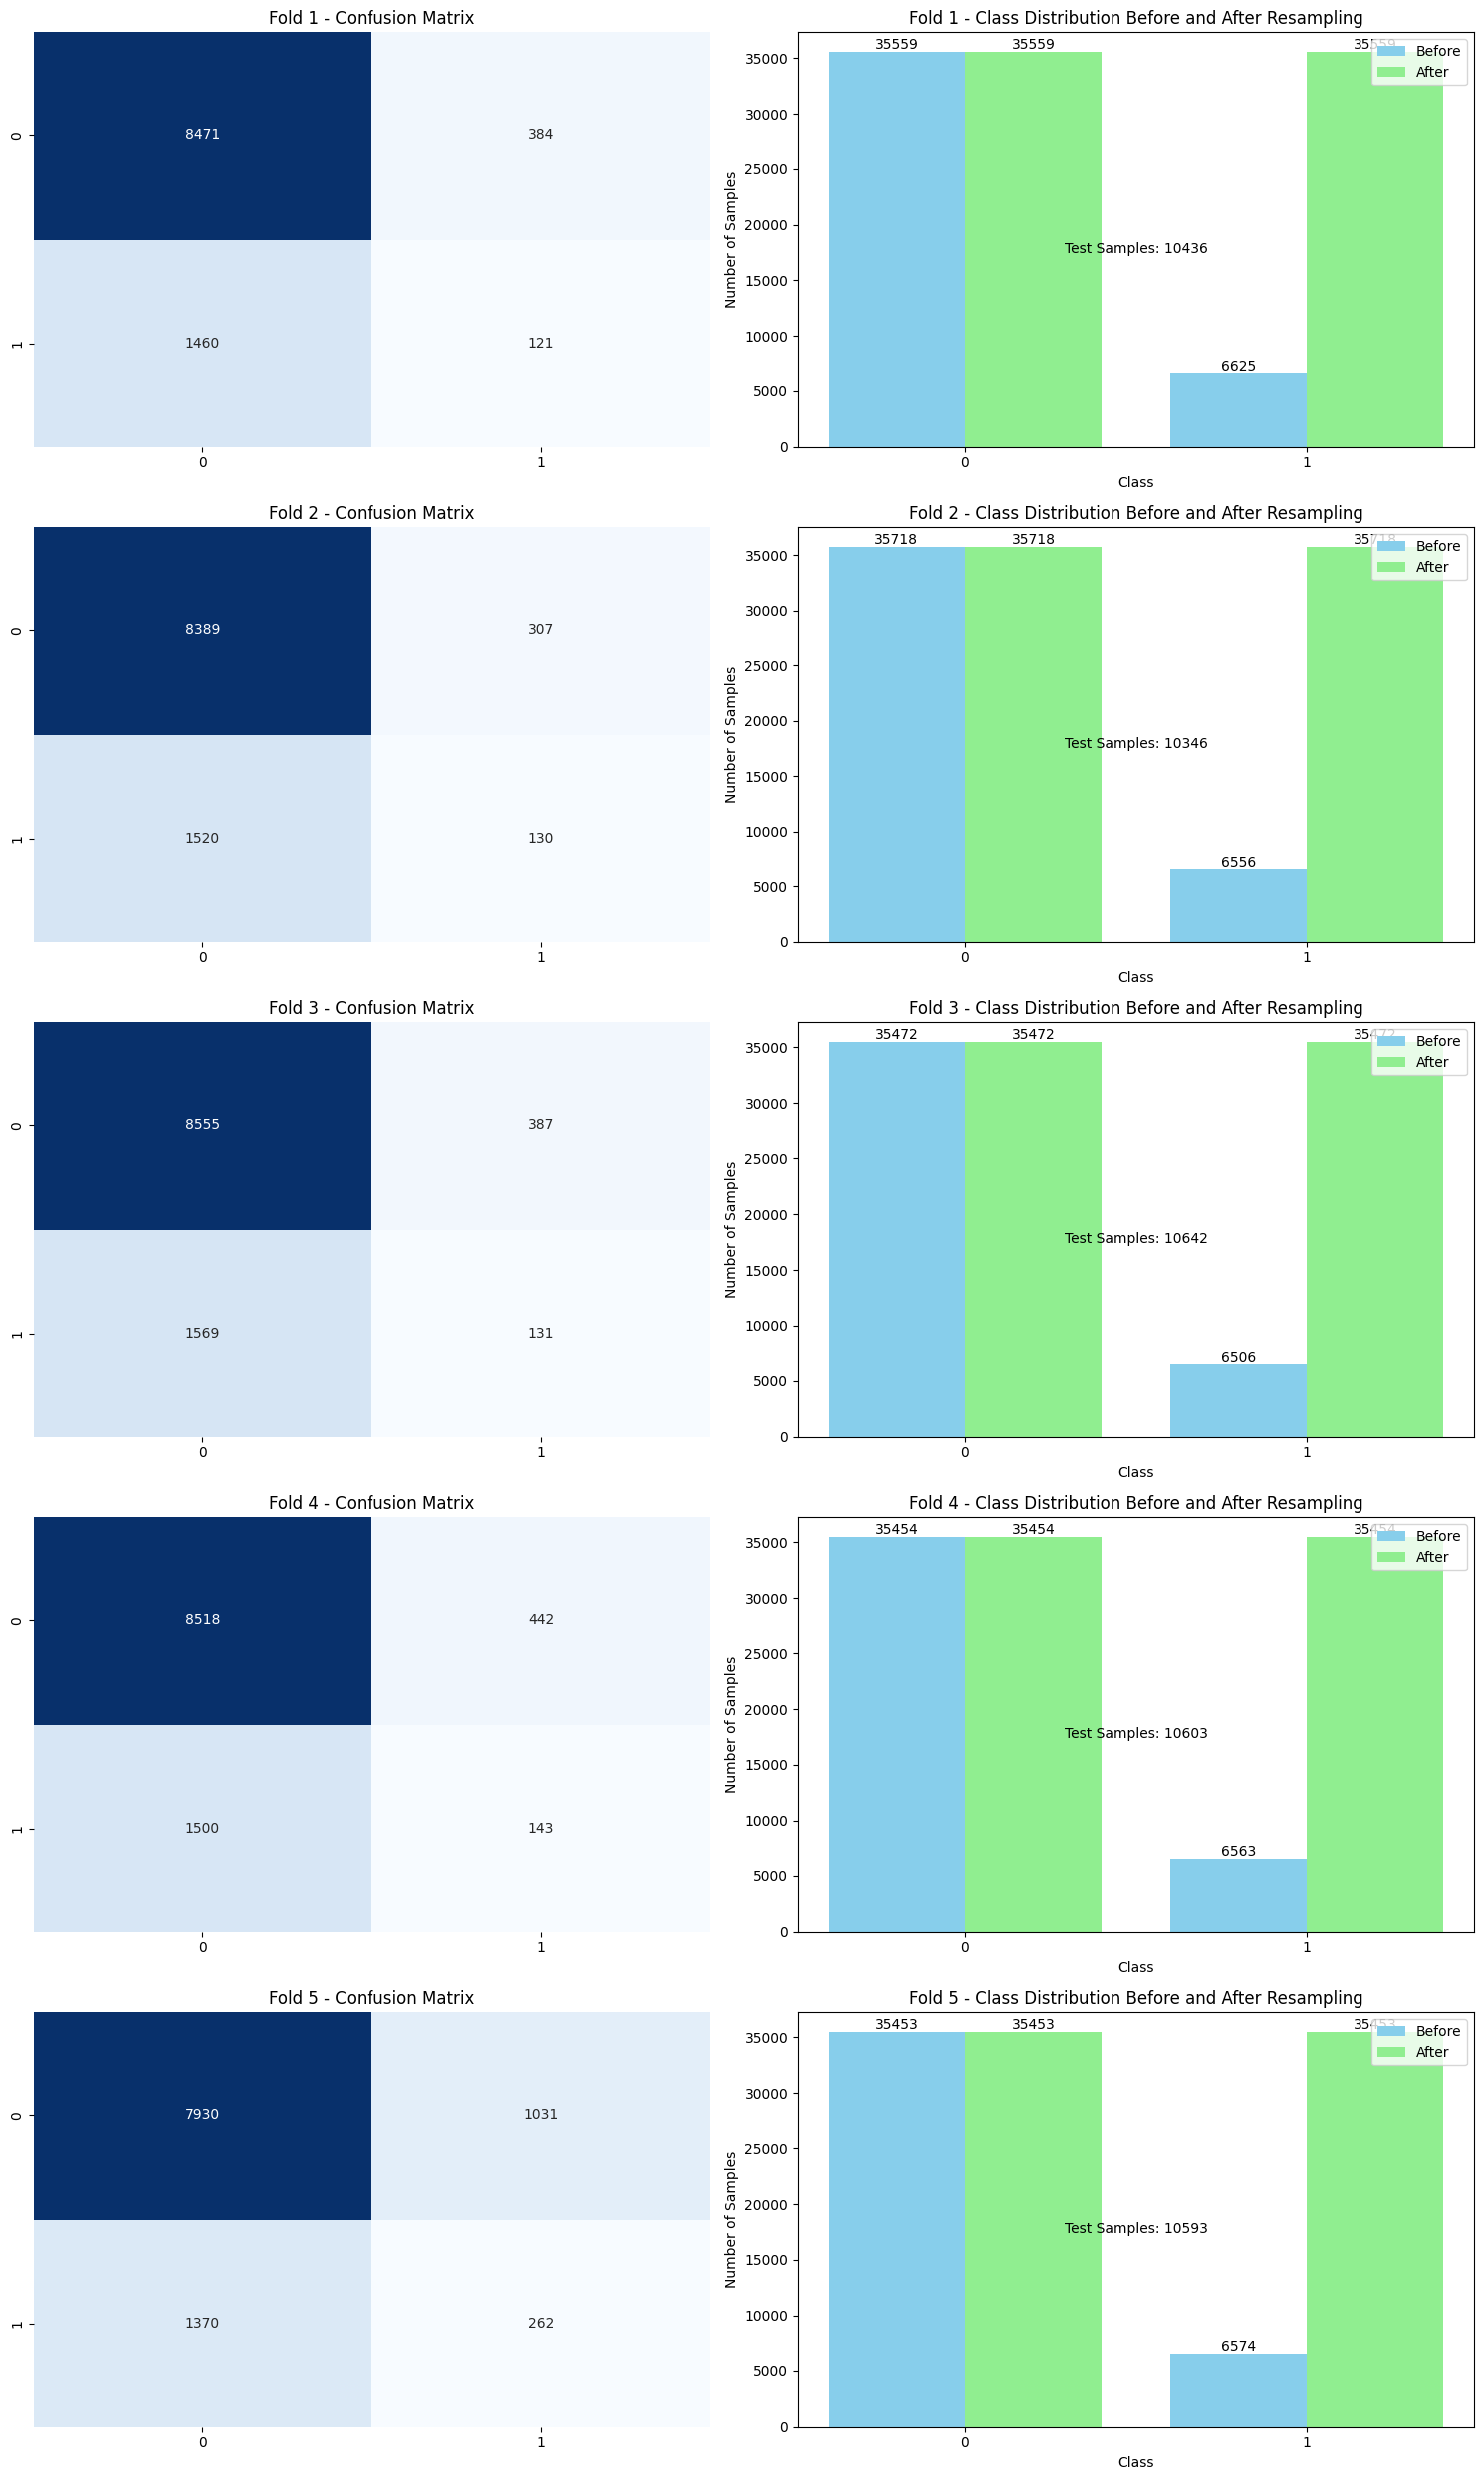

In [32]:
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data2_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Original vs. Resampled Train Samples
    ax2 = axes[fold, 1]

    original_label_counts = Counter(data2_y_train_before_resampled[fold])
    resampled_label_counts = Counter(data2_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax2.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax2.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax2.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Number of Samples')
    ax2.set_xticks(resampled_classes)
    ax2.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax2.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax2.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax2.text(center_x, center_y, f'Test Samples: {data2_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


# **CCM**

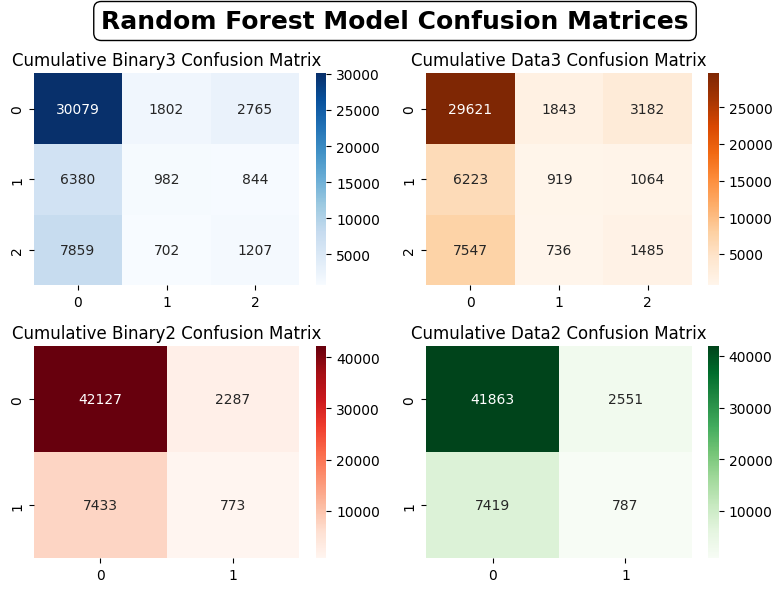

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cumulative_bi3_conf_mat = np.sum(binary3_conf_mat_list, axis=0)
cumulative_data3_conf_mat = np.sum(data3_conf_mat_list, axis=0)
cumulative_data2_conf_mat = np.sum(data2_conf_mat_list, axis=0)
cumulative_bi2_conf_mat = np.sum(binary2_conf_mat_list, axis=0)

# Plotting subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

fig.suptitle('Random Forest Model Confusion Matrices', fontsize=18, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'), weight='bold', va='top')

# Plot cumulative confusion matrices
sns.heatmap(cumulative_bi3_conf_mat, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Cumulative Binary3 Confusion Matrix')

sns.heatmap(cumulative_data3_conf_mat, annot=True, fmt='d', cmap='Oranges', ax=axes[0, 1])
axes[0, 1].set_title('Cumulative Data3 Confusion Matrix')

sns.heatmap(cumulative_bi2_conf_mat, annot=True, fmt='d', cmap='Reds', ax=axes[1, 0])
axes[1, 0].set_title('Cumulative Binary2 Confusion Matrix')

sns.heatmap(cumulative_data2_conf_mat, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_title('Cumulative Data2 Confusion Matrix')


plt.tight_layout()
plt.show()

##**Check**

In [34]:
binary2_X.columns

Index(['G1M2:ARB', 'G3M1:Statin', 'G5M2:NSAIDs', 'G1M5:Diuretic',
       'G1M7:Beta blocker', 'G1M3:Dihydropyridine CCB', 'G1M6:MRA',
       'G1M1:ACEI', 'G2M2:Metformin', 'G2M3:DPP4 inhibitor',
       ...
       'newL24:HDL Cholesterol', 'newL25:Parathyroid hormone',
       'newL26:Vitamin D', 'newL27:UrineAlbumin/Cr ratio',
       'newL28:UrineProtein/Cr ratio', 'newL29:UrineVolume (24hrs)',
       'newL30:UrineUrea (24hrs)', 'newL31:UrineSodium (24hrs)',
       'newL32:UrineProtein (24hrs)', 'TimeDiff'],
      dtype='object', length=120)

In [35]:
binary3_X.columns

Index(['G1M2:ARB', 'G3M1:Statin', 'G5M2:NSAIDs', 'G1M5:Diuretic',
       'G1M7:Beta blocker', 'G1M3:Dihydropyridine CCB', 'G1M6:MRA',
       'G1M1:ACEI', 'G2M2:Metformin', 'G2M3:DPP4 inhibitor',
       ...
       'newL24:HDL Cholesterol', 'newL25:Parathyroid hormone',
       'newL26:Vitamin D', 'newL27:UrineAlbumin/Cr ratio',
       'newL28:UrineProtein/Cr ratio', 'newL29:UrineVolume (24hrs)',
       'newL30:UrineUrea (24hrs)', 'newL31:UrineSodium (24hrs)',
       'newL32:UrineProtein (24hrs)', 'TimeDiff'],
      dtype='object', length=120)

In [36]:
data2_X.columns

Index(['InPatient', 'OutPatient', 'Emergency', 'VisitLocation', 'G1M2-ARB',
       'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
   

In [37]:
data3_X.columns

Index(['InPatient', 'OutPatient', 'Emergency', 'VisitLocation', 'G1M2-ARB',
       'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
   